In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

(a)

In [2]:
hw_regression = pd.read_csv("../datasets/auto-mpg.csv")
hw_regression.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
hw_regression['horsepower'].dtype

dtype('O')

In [4]:
hw_regression.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [5]:
hw_regression['horsepower'] = hw_regression['horsepower'].replace(to_replace ='?',value ='0')


In [6]:
hw_regression['horsepower'] = hw_regression['horsepower'].astype(str).astype(int)
hw_regression['horsepower'].dtype

dtype('int64')

In [7]:
hw_regression.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [8]:
y = hw_regression['mpg']
X = hw_regression.drop(['car name','mpg'], axis = 1)

scaler = StandardScaler()
X_standardised = scaler.fit_transform(X)
X_train , X_test , y_train, y_test = train_test_split(X_standardised, y,
                                                     train_size = 0.667,random_state = 42)

X_standardised

array([[ 1.49819126,  1.0906037 ,  0.67394962, ..., -1.29549834,
        -1.62742629, -0.71514478],
       [ 1.49819126,  1.5035143 ,  1.54418676, ..., -1.47703779,
        -1.62742629, -0.71514478],
       [ 1.49819126,  1.19623199,  1.17122799, ..., -1.65857724,
        -1.62742629, -0.71514478],
       ...,
       [-0.85632057, -0.56103873, -0.46979062, ..., -1.4407299 ,
         1.62198339, -0.71514478],
       [-0.85632057, -0.70507731, -0.59411021, ...,  1.10082237,
         1.62198339, -0.71514478],
       [-0.85632057, -0.71467988, -0.51951845, ...,  1.39128549,
         1.62198339, -0.71514478]])

In [9]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

(b)

In [10]:
for name,coefficient in zip(X.columns, model.coef_):
    print('{:>12} : {:>5.2f}'.format(name, coefficient))

   cylinders :  0.03
displacement :  0.70
  horsepower : -0.32
      weight : -5.34
acceleration :  0.25
  model year :  2.88
      origin :  1.18


The coefficient for 'model year' is the highest and the dominant feature.

In [11]:
print(model.coef_)
mse = mean_squared_error(y_test,y_pred)
print('Mean Square Error =',mse)

[ 0.02575576  0.69548504 -0.31987075 -5.33525957  0.25320403  2.88057601
  1.17585514]
Mean Square Error = 9.153325912213072


(c)

In [12]:
# alphas = np.logspace(-6, 6, 13)
alphas = np.logspace(-10, 10, 1000)

one = linear_model.RidgeCV(alphas=alphas, cv=3)
result = one.fit(X_train, y_train)
print(f"best alpha from RidgeCV: {one.alpha_}, score {one.score(X_train, y_train)}")
parameters = {'alpha':alphas}
models = GridSearchCV(linear_model.Ridge(), parameters, cv=KFold(n_splits=3))
models.fit(X_train, y_train)
rts = models.cv_results_['rank_test_score']
print(f"best alpha from GridSearchCV: {alphas[np.where(rts==1)]}")


best alpha from RidgeCV: 1.622595287078087, score 0.8054357156178443
best alpha from GridSearchCV: [1.62259529]


In [13]:
alphas = np.logspace(-6, 6, 13)

two = linear_model.LassoCV(alphas=alphas)
result = one.fit(X_train, y_train)
print(f"best alpha from LassoCV: {one.alpha_}, score {one.score(X_train, y_train)}")
parameters = {'alpha':alphas}
models = linear_model.Lasso(alpha = one.alpha_)
models.fit(X_train, y_train)
y_pred = models.predict(X_test)

best alpha from LassoCV: 1.622595287078087, score 0.8054357156178443


Text(0, 0.5, 'coefficient')

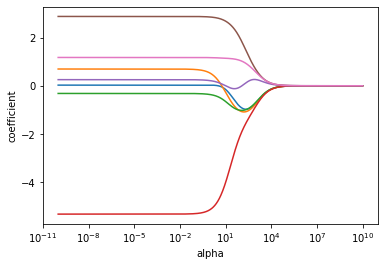

In [14]:
ridge = linear_model.Ridge()
coef = []
alphas = np.logspace(-10, 10, 1000)
for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X_train, y_train)
    coef.append(ridge.coef_)
    
ax = plt.gca()
ax.plot(alphas, coef)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('coefficient')

Text(0, 0.5, 'coefficient')

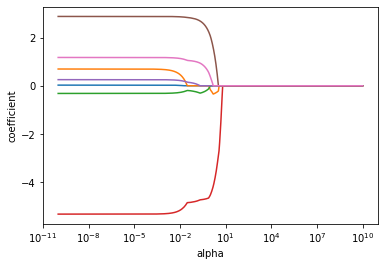

In [15]:
lasso = linear_model.Lasso()
coef = []
alphas = np.logspace(-10, 10, 1000)
for a in alphas:
    lasso.set_params(alpha = a)
    lasso.fit(X_train, y_train)
    coef.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(alphas, coef)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('coefficient')

In [16]:
ridgeX = linear_model.Ridge(alpha = -6.5)
ridgeX.fit(X_train, y_train)
y_pred = ridgeX.predict(X_test)

In [17]:
mse = mean_squared_error(y_test,y_pred)
print('Mean Square Error =',mse)

Mean Square Error = 8.728135730388175


By hit and trial we got alpha value as -6.5, which produces the lowest value of Mean Squared Error.

In [18]:
for name,coefficient in zip(X.columns, ridgeX.coef_):
    print('{:>12} : {:>5.2f}'.format(name, coefficient))

   cylinders : -1.49
displacement :  5.00
  horsepower : -0.04
      weight : -7.93
acceleration :  0.84
  model year :  3.11
      origin :  1.46


Ridge increases the significance of the attributes.

In [19]:
lassoX = linear_model.Lasso(alpha = 0.4)
lassoX.fit(X_train, y_train)
y_pred = lassoX.predict(X_test)

In [20]:
for name,coefficient in zip(X.columns, lassoX.coef_):
    print('{:>12} : {:>5.2f}'.format(name, coefficient))

   cylinders : -0.00
displacement : -0.00
  horsepower : -0.25
      weight : -4.72
acceleration :  0.00
  model year :  2.54
      origin :  0.81


In [21]:
mse = mean_squared_error(y_test,y_pred)
print('Mean Square Error =',mse)

Mean Square Error = 9.137237885400307


Even though Lasso produces relatively higher mean squared error, it has reduced the significance / importance of the attributes.

Conclusions:

* For Ordinary Linear Regression,
    Mean Squared Error = 9.153, Coefficient of model year = 2.88
    

* For Ridge Regression,
    Mean Squared Error = 8.728, Coefficient of model year = 3.11

* For Lasso Regression,
    Mean Squared Error = 9.173, Coefficient of model year = 2.54

* Lasso Regression produces the highest value of MSE and has reduced the coefficient of model year when compared to Ordinary Linear Regression and Rigde Regression.

* Ridge Regression produces the maximum value of coefficient of model year.